In [1]:
import pandas as pd
import numpy as np

In [2]:
masterdf = pd.read_csv("late_forecast_data.csv", index_col=0, parse_dates=True)
# dtype={"Unnamed: 0.1": np.float64, "Cand_Name": str, "Cand_Office_St": np.float64, "Cand_Office_Dist": np.float64, "Cand_Party_Affiliation": str, "Year": np.float64, "recent_presidential_vote": np.float64, "percent_bachelor_or_above": np.float64, "gov_party": str, "Party_Previous_Vote_Share": np.float64, "Incumbent": np.float64, "minority_percentage": np.float64, "Gender": np.float64, "Presidential_Approval_Rating": np.float64, "Same_Party_As_President": np.float64, "seat_transition": np.float64, "Median_income": np.float64, "name_commonness": np.float64, "Primary.Vote.Percent": np.float64, "won": np.float64}



In [3]:
masterdf.columns

Index(['Cand_Office_Dist', 'Year', 'recent_presidential_vote',
       'percent_bachelor_or_above', 'Party_Previous_Vote_Share', 'Incumbent',
       'minority_percentage', 'Gender', 'Presidential_Approval_Rating',
       'Same_Party_As_President', 'Median_Income', 'labor_force', 'Raised',
       'Spent', 'won', 'projected_D', 'projected_R', 'cand_indicator_REP',
       'state_indicator_AL', 'state_indicator_AR', 'state_indicator_AZ',
       'state_indicator_CA', 'state_indicator_CO', 'state_indicator_CT',
       'state_indicator_DE', 'state_indicator_FL', 'state_indicator_GA',
       'state_indicator_HI', 'state_indicator_IA', 'state_indicator_ID',
       'state_indicator_IL', 'state_indicator_IN', 'state_indicator_KS',
       'state_indicator_KY', 'state_indicator_LA', 'state_indicator_MA',
       'state_indicator_MD', 'state_indicator_ME', 'state_indicator_MI',
       'state_indicator_MN', 'state_indicator_MO', 'state_indicator_MS',
       'state_indicator_MT', 'state_indicator_NC', '

In [4]:
# Function for filling missing data
def fill_na(df, columns):
    df_copy = df.copy()
    for col in columns:
        na_df = df[pd.isnull(df[col])]
        na_rows = na_df.iterrows()
        for _, na_row in na_rows:
            district_subset = df[(df["Cand_Office_St"] == na_row["Cand_Office_St"]) & (df["Cand_Office_Dist"] == na_row["Cand_Office_Dist"]) & (~pd.isnull(df[col]))]
            state_subset = df[(df["Cand_Office_St"] == na_row["Cand_Office_St"]) & (~pd.isnull(df[col]))]
            if len(district_subset) > 0:
                district_mean = np.mean(district_subset[col])
                df_copy.loc[(df_copy["Cand_Office_St"] == na_row["Cand_Office_St"]) & (df_copy["Cand_Office_Dist"] == na_row["Cand_Office_Dist"]) & (pd.isnull(df_copy[col])), col] = district_mean
            elif len(state_subset) > 0:
                state_mean = np.mean(state_subset[col])
                df_copy.loc[(df_copy["Cand_Office_St"] == na_row["Cand_Office_St"]) & (df_copy["Cand_Office_Dist"] == na_row["Cand_Office_Dist"]) & (pd.isnull(df_copy[col])), col] = state_mean
            else:
                ovr_mean = np.mean(df[~pd.isnull(df[col])][col])
                df_copy.loc[(df_copy["Cand_Office_St"] == na_row["Cand_Office_St"]) & (df_copy["Cand_Office_Dist"] == na_row["Cand_Office_Dist"]) & (pd.isnull(df_copy[col])), col] = ovr_mean
    return df_copy

In [5]:
masterdf.head()

,Cand_Office_Dist,Year,recent_presidential_vote,percent_bachelor_or_above,Party_Previous_Vote_Share,Incumbent,minority_percentage,Gender,Presidential_Approval_Rating,Same_Party_As_President,...,state_indicator_SD,state_indicator_TN,state_indicator_TX,state_indicator_UT,state_indicator_VA,state_indicator_VT,state_indicator_WA,state_indicator_WI,state_indicator_WV,state_indicator_WY
Cand_Name,,,,,,,,,,,,,,,,,,,,,
"CRAWFORD, HARRY T JR",0,2010,0.525392,27.0,0.451464,0,0.32569,1,0.38,True,...,0,0,0,0,0,0,0,0,0,0
"YOUNG, DONALD E",0,2010,0.525392,27.0,0.503333,1,0.32569,1,0.38,False,...,0,0,0,0,0,0,0,0,0,0
"BONNER, JO",1,2010,0.390789,20.5,1.000000,1,0.32626,1,0.41,False,...,0,0,0,0,0,0,0,0,0,0
"BRIGHT SR, BOBBY NEAL",2,2010,0.407024,19.3,0.503119,0,0.35261,1,0.41,True,...,0,0,0,0,0,0,0,0,0,0
"ROBY, MARTHA",2,2010,0.407024,19.3,0.496881,0,0.35261,0,0.41,False,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# full2018 = masterdf[masterdf["Year"] == 2018]
# full2018.drop(inplace=True, columns = ["Unnamed: 0.1", "won"])
# full2018 = full2018.fill_na

/Users/ashwin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
def project_D (row):
    if row['Year'] == 2010 :
        return 44.8
    if row['Year'] == 2012 :
        return 47.3
    if row['Year'] == 2014 :
        return 45.7
    if row['Year'] == 2016 :
        return 46.0
    if row['Year'] == 2018 :
        return 49.4
    else:
        return 0
    
def project_R (row):
    if row['Year'] == 2010 :
        return 51.6
    if row['Year'] == 2012 :
        return 47.5
    if row['Year'] == 2014 :
        return 51.4
    if row['Year'] == 2016 :
        return 45.4
    if row['Year'] == 2018 :
        return 41.9
    else:
        return 0

In [7]:
masterdf.columns

Index(['Cand_Office_Dist', 'Year', 'recent_presidential_vote',
       'percent_bachelor_or_above', 'Party_Previous_Vote_Share', 'Incumbent',
       'minority_percentage', 'Gender', 'Presidential_Approval_Rating',
       'Same_Party_As_President', 'Median_Income', 'labor_force', 'Raised',
       'Spent', 'won', 'projected_D', 'projected_R', 'cand_indicator_REP',
       'state_indicator_AL', 'state_indicator_AR', 'state_indicator_AZ',
       'state_indicator_CA', 'state_indicator_CO', 'state_indicator_CT',
       'state_indicator_DE', 'state_indicator_FL', 'state_indicator_GA',
       'state_indicator_HI', 'state_indicator_IA', 'state_indicator_ID',
       'state_indicator_IL', 'state_indicator_IN', 'state_indicator_KS',
       'state_indicator_KY', 'state_indicator_LA', 'state_indicator_MA',
       'state_indicator_MD', 'state_indicator_ME', 'state_indicator_MI',
       'state_indicator_MN', 'state_indicator_MO', 'state_indicator_MS',
       'state_indicator_MT', 'state_indicator_NC', '

In [8]:
# TODO: probably dropna instead of fillna
# dfs = masterdf[["Year", "Cand_Office_Dist", "recent_presidential_vote", "percent_bachelor_or_above", "Party_Previous_Vote_Share", "Incumbent", "minority_percentage", "Gender", "Presidential_Approval_Rating", "Same_Party_As_President", "Median_Income", "Raised","Spent","won"]]
dfs = masterdf
dfs.drop(inplace = True, columns = 'Gender')
dfs.drop(inplace = True, columns = [x for x in dfs.columns if (x[0:5]=='state')])
# dfs['projected_D'] = dfs.apply (lambda row: project_D (row),axis=1)
# dfs['projected_R'] = dfs.apply (lambda row: project_R (row),axis=1)
# dfs = dfs.fillna(0)
X_test = dfs[dfs["Year"] == 2018]
dfs = dfs[dfs["Year"] != 2018]
dfs.drop(inplace = True, columns = "Year")
X_test.drop(inplace = True, columns = "Year")


/Users/ashwin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/ashwin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [48]:
dfs.columns

Index(['Cand_Office_Dist', 'recent_presidential_vote',
       'percent_bachelor_or_above', 'Party_Previous_Vote_Share', 'Incumbent',
       'minority_percentage', 'Presidential_Approval_Rating',
       'Same_Party_As_President', 'Median_Income', 'labor_force', 'Raised',
       'Spent', 'won', 'projected_D', 'projected_R', 'cand_indicator_REP'],
      dtype='object')

In [49]:
dfs.head()

,Cand_Office_Dist,recent_presidential_vote,percent_bachelor_or_above,Party_Previous_Vote_Share,Incumbent,minority_percentage,Presidential_Approval_Rating,Same_Party_As_President,Median_Income,labor_force,Raised,Spent,won,projected_D,projected_R,cand_indicator_REP
Cand_Name,,,,,,,,,,,,,,,,
"CRAWFORD, HARRY T JR",0,0.525392,27.0,0.451464,0,0.32569,0.38,True,64576.0,78.1,240439.24,235571.43,0,44.8,51.6,0
"YOUNG, DONALD E",0,0.525392,27.0,0.503333,1,0.32569,0.38,False,64576.0,78.1,1001015.37,887310.33,1,44.8,51.6,1
"BONNER, JO",1,0.390789,20.5,1.000000,1,0.32626,0.41,False,41172.0,79.8,913052.62,1101701.00,1,44.8,51.6,1
"BRIGHT SR, BOBBY NEAL",2,0.407024,19.3,0.503119,0,0.35261,0.41,True,40567.0,80.0,1413031.76,1435526.44,0,44.8,51.6,0
"ROBY, MARTHA",2,0.407024,19.3,0.496881,0,0.35261,0.41,False,40567.0,80.0,1253557.11,1240275.64,1,44.8,51.6,1


In [9]:
Y = dfs["won"]
X = dfs.drop(columns="won")
Y_test = X_test["won"]
X_test.drop(columns="won", inplace=True)

/Users/ashwin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Feature Selection
### Backwards Selection and Cross-Validation

In [ ]:
## TAKES A WHILE TO RUN SO SKIP UNLESS DESIRED

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# test classification
# X, Y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                            n_redundant=2, n_repeated=0, n_classes=8,
#                            n_clusters_per_class=1, random_state=0)

# Create the RFE object and cross-validate
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

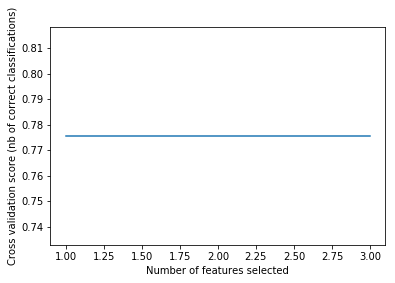

In [87]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Prediction
### Random Forest Classifier

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# x, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X, Y)

for feat in X.columns:
    print(feat + ": " + str(clf.feature_importances_[list(X.columns).index(feat)]))
# print(clf.feature_importances_)
print("\nScore: " + str(clf.fit(X,Y).score(X,Y)))


Cand_Office_Dist: 0.0009273809226238309
recent_presidential_vote: 0.03972845317541864
percent_bachelor_or_above: 0.000988997663209516
Party_Previous_Vote_Share: 0.19427493167806262
Incumbent: 0.30855342122053525
minority_percentage: 0.0073437519416444715
Presidential_Approval_Rating: 0.010054810701920665
Same_Party_As_President: 0.017267070215687852
Median_Income: 0.0033576387619835076
labor_force: 0.0005847482997632976
Raised: 0.2024305145969289
Spent: 0.2083853480047262
projected_D: 0.0004026538588476976
projected_R: 0.00017890559222334527
cand_indicator_REP: 0.005521373366424247

Score: 0.9094512195121951


In [11]:
zipped = list(zip(X.columns, clf.feature_importances_))

print(sorted(zipped, key=lambda a: a[1], reverse=True))

[('Incumbent', 0.30855342122053525), ('Spent', 0.2083853480047262), ('Raised', 0.2024305145969289), ('Party_Previous_Vote_Share', 0.19427493167806262), ('recent_presidential_vote', 0.03972845317541864), ('Same_Party_As_President', 0.017267070215687852), ('Presidential_Approval_Rating', 0.010054810701920665), ('minority_percentage', 0.0073437519416444715), ('cand_indicator_REP', 0.005521373366424247), ('Median_Income', 0.0033576387619835076), ('percent_bachelor_or_above', 0.000988997663209516), ('Cand_Office_Dist', 0.0009273809226238309), ('labor_force', 0.0005847482997632976), ('projected_D', 0.0004026538588476976), ('projected_R', 0.00017890559222334527)]


In [12]:
import matplotlib.pyplot as plt

srt = sorted(zipped, key=lambda a: a[1], reverse=True)
unsrt = list(zip(*srt))
implabels = unsrt[0]
ximp = unsrt[1]
print(implabels)

('Incumbent', 'Spent', 'Raised', 'Party_Previous_Vote_Share', 'recent_presidential_vote', 'Same_Party_As_President', 'Presidential_Approval_Rating', 'minority_percentage', 'cand_indicator_REP', 'Median_Income', 'percent_bachelor_or_above', 'Cand_Office_Dist', 'labor_force', 'projected_D', 'projected_R')


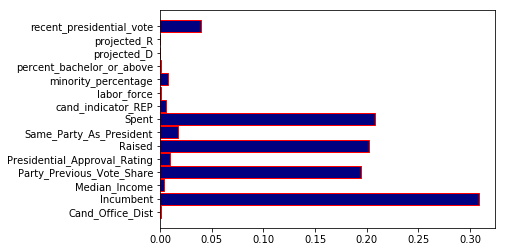

In [13]:
plt.barh(implabels,ximp,color='navy',edgecolor='red',height=.9)
# plt.xticks(rotation='vertical')
plt.show()

In [14]:
clf.classes_

array([0, 1])

In [12]:
np.shape(clf.predict_proba(X_test))

(835, 2)

In [53]:
probs = clf.predict_proba(X_test)

In [54]:
X_test_with_probs = X_test
X_test_with_probs["Lose Prob"] = probs[:,0]
X_test_with_probs["Win Prob"] = probs[:,1]

/Users/ashwin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ashwin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
X_test_with_probs.head()

,Cand_Office_Dist,recent_presidential_vote,percent_bachelor_or_above,Party_Previous_Vote_Share,Incumbent,minority_percentage,Presidential_Approval_Rating,Same_Party_As_President,Median_Income,labor_force,Raised,Spent,projected_D,projected_R,cand_indicator_REP,Lose Prob,Win Prob
Cand_Name,,,,,,,,,,,,,,,,,
"YOUNG, DONALD E",0,0.525392,28.8,0.503000,1,0.35812,0.48,True,73181.0,76.1,1003579.47,960955.52,49.4,41.9,1,0.189487,0.810513
"BYRNE, BRADLEY ROBERTS",1,0.352134,23.3,1.000000,1,0.32747,0.62,True,47984.0,74.3,1235570.11,645776.76,49.4,41.9,1,0.172563,0.827437
"KENNEDY, ROBERT JR.",1,0.352134,23.3,0.000000,0,0.32747,0.62,False,47984.0,74.3,76091.03,31564.26,49.4,41.9,0,0.863142,0.136858
"ISNER, TABITHA KAY",2,0.380884,21.8,0.453655,0,0.35441,0.62,False,46579.0,76.3,405460.57,267916.56,49.4,41.9,0,0.785769,0.214231
"ROBY, MARTHA",2,0.380884,21.8,0.546345,1,0.35441,0.62,True,46579.0,76.3,2479632.21,2065173.18,49.4,41.9,1,0.189721,0.810279


In [56]:
X_test_with_probs.to_csv("2018_with_probs.csv")

In [33]:
# full2018["Lose Prob"] = probs[:,0]
# full2018["Win Prob"] = probs[:,1]


In [34]:
# full2018.to_csv("full2018.csv")